## Final Phase 2 Project Submission

Please fill out:
* Student name: CARLTON OGOLA
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Faith Rotich
* Blog post URL:


We start by first importing all the necessary python libraries necessary for all our procedures. For this project we are tested on our knowledge and skills in data cleaning, data visualisation, and presentation skills.

In [320]:
# We start by importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning
In our files we have the Box Office Mojo data set together with the Numbers data set which are used by movie companies as the financial sources of the data whereas the IMDb data set is used to provide a rich layer of audience sentiment while provides a rich layer of audience sentiment while Rotten Tomatoes offers a metric for critical and audience consensus and the Movie Database stores general information and is used to identify franchises.

Since the Box OfficeMojo data set and the Numbers data set provide the same information, we will drop one.We will also not use the IMDb data set for the same reason

We start by loading the data sets

In [321]:
# Load the dataset
bom_movie_gross= pd.read_csv('zippedData/bom.movie_gross.csv.gz')
r_tomatoes_movies= pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', encoding='latin-1')
r_tomatoes_reviews= pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')



Display a part of each data set in order to to identify how they look

In [322]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [323]:
r_tomatoes_movies

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [324]:
r_tomatoes_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


Now we drop columns that may be irrelevant to our analysis to make the data sets tidier and easier to analyse

In [325]:
r_tomatoes_movies.drop(columns=['id', 'synopsis', 'director','writer','currency','studio','box_office'],inplace=True)
r_tomatoes_reviews.drop(columns=['review','critic','top_critic','publisher'], inplace=True)



We also have to get rid of the rows with missing values.

For this, we start by getting the number of missing values in each column.

In [326]:
bom_movie_gross.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [327]:
r_tomatoes_movies.isnull().sum()

rating            3
genre             8
theater_date    359
dvd_date        359
runtime          30
dtype: int64

In [328]:
r_tomatoes_reviews.isnull().sum()

id            0
rating    13517
fresh         0
date          0
dtype: int64

From this we can clearly see that there are columns that we can try to fill in order to maintain a data set that can accurately represent the data while we can also completely remove columns which cannot be filled or columns that are too few to have impact on the data sets.

In [329]:
#The data in the column for foreign gross is not a numeric data type so it has to be converted
bom_movie_gross['foreign_gross'] = pd.to_numeric(
    bom_movie_gross['foreign_gross'],
    errors='coerce'
)
#We will fill the missing values with the mean of the column since the mode is not a good option for this column
bom_movie_gross_mean = bom_movie_gross['foreign_gross'].mean(skipna=True)
bom_movie_gross['foreign_gross']=bom_movie_gross['foreign_gross'].fillna(bom_movie_gross_mean)

bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.505704e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.505704e+07,2018
3384,El Pacto,Sony,2500.0,7.505704e+07,2018
3385,The Swan,Synergetic,2400.0,7.505704e+07,2018


In [330]:
#This is to convert the data in the column to numeric data type
r_tomatoes_reviews['rating'] = pd.to_numeric(
    r_tomatoes_reviews['rating'].astype(str).str.split('/').str[0],
    errors='coerce'
)
r_tomatoes_reviewsmode = r_tomatoes_reviews['rating'].mode()[0]
r_tomatoes_reviews['rating']=r_tomatoes_reviews['rating'].fillna(r_tomatoes_reviewsmode)

r_tomatoes_reviews
#(r_tomatoes_reviews_mode = r_tomatoes_reviews['rating'].mode()[0]
#r_tomatoes_reviews['rating'] = r_tomatoes_reviews['rating'].fillna(r_tomatoes_reviews_mode)
#r_tomatoes_reviews)

,id,rating,fresh,date
0,3,3.0,fresh,"November 10, 2018"
1,3,3.0,rotten,"May 23, 2018"
2,3,3.0,fresh,"January 4, 2018"
3,3,3.0,fresh,"November 16, 2017"
4,3,3.0,fresh,"October 12, 2017"
...,...,...,...,...
54427,2000,3.0,fresh,"September 24, 2002"
54428,2000,1.0,rotten,"September 21, 2005"
54429,2000,2.0,rotten,"July 17, 2005"
54430,2000,2.5,rotten,"September 7, 2003"


Next we drop rows that are too few to effect our sample data now that our sample represents the larger part of our data quite accurately.

For this we can drop them in one cell.

In [331]:
clean_bom_gross=bom_movie_gross.dropna()
clean_r_tomatoes_reviews=r_tomatoes_reviews.dropna()
clean_r_tomatoes_movies=r_tomatoes_movies.dropna()




This is now the end of data cleaning as the cleaned data sets may now be used for data visualisation and analysis.

I will add a column named total gross in the bom data set as this is important to know the total gross per year for each movie

In [332]:
bom_movie_gross['domestic_gross'] = pd.to_numeric(
    bom_movie_gross['domestic_gross'],
    errors='coerce'
)
clean_bom_gross.loc[:,'total_gross'] = clean_bom_gross['domestic_gross'] + clean_bom_gross['foreign_gross']
clean_bom_gross

C:\Users\wayca\AppData\Local\Temp\ipykernel_12104\472729182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_bom_gross.loc[:,'total_gross'] = clean_bom_gross['domestic_gross'] + clean_bom_gross['foreign_gross']


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010,9.603000e+08
3,Inception,WB,292600000.0,5.357000e+08,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.505704e+07,2018,7.506324e+07
3383,Edward II (2018 re-release),FM,4800.0,7.505704e+07,2018,7.506184e+07
3384,El Pacto,Sony,2500.0,7.505704e+07,2018,7.505954e+07
3385,The Swan,Synergetic,2400.0,7.505704e+07,2018,7.505944e+07


Text(0.5, 1.0, 'Total Gross per Year')

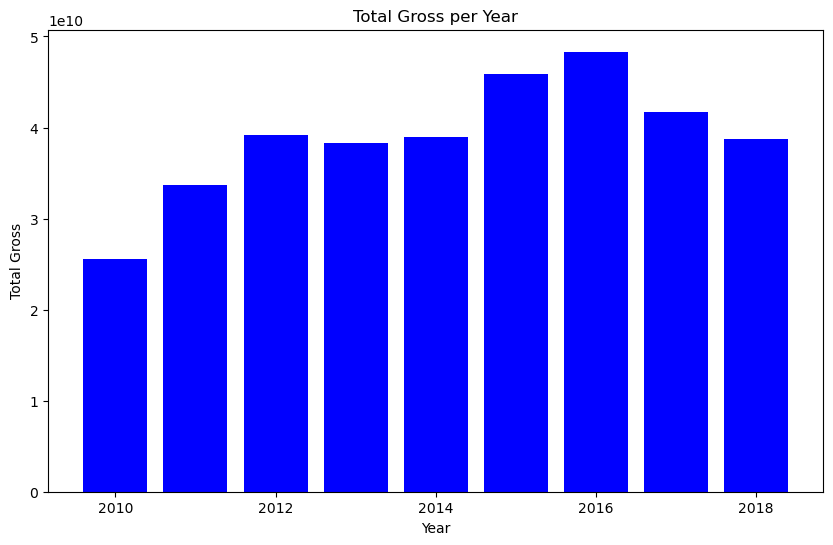

In [303]:
# This is the code to visualize the total gross per year
yearly_gross = clean_bom_gross.groupby('year')['total_gross'].sum()
x_years = yearly_gross.index
y_totals = yearly_gross.values


# This part of the code ensures that the plot is easier to read
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_years, y_totals, color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Total Gross')
ax.set_title('Total Gross per Year')


We are going to try making visuals from the Rotten Tomatoes movies data set. From this we are able to get our genres and runtime which are very crucials for our findings

In [333]:
clean_r_tomatoes_movies

,rating,genre,theater_date,dvd_date,runtime
0,R,Action and Adventure|Classics|Drama,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,R,Drama|Musical and Performing Arts,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,R,Drama|Mystery and Suspense,"Dec 9, 1994","Aug 27, 1997",128 minutes
5,PG,Drama|Kids and Family,"Mar 3, 2000","Jul 11, 2000",95 minutes
...,...,...,...,...,...
1555,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962","May 11, 2004",111 minutes
1558,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993","Jan 29, 2002",101 minutes


Since our genre column is a bit complicated since different genres have been separated using 'and' together with "|", we need to split these values present in the columns. 

In [334]:
# This is to split the genre column into a list of genres
clean_r_tomatoes_movies['genre'] = clean_r_tomatoes_movies['genre'].astype(str)
separator_regex = r'\s*[,;]\s*'  # Regex to split by comma or semicolon with optional spaces
#clean_r_tomatoes_movies['genre'] = clean_r_tomatoes_movies['genre'].astype(str).str.split(separator_regex)
clean_r_tomatoes_movies.loc[:, 'genre'] = clean_r_tomatoes_movies.loc[:, 'genre'].astype(str).str.split(separator_regex)
# We use a method known as exploding the data frame to create a new row for each genre
clean_r_tomatoes_movies = clean_r_tomatoes_movies.explode('genre')
genre_counts = clean_r_tomatoes_movies['genre'].value_counts()
genre_counts.head(10)

C:\Users\wayca\AppData\Local\Temp\ipykernel_12104\1591335852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_r_tomatoes_movies['genre'] = clean_r_tomatoes_movies['genre'].astype(str)


genre
Drama                                              102
Comedy                                              88
Comedy|Drama                                        63
Drama|Mystery and Suspense                          50
Art House and International|Drama                   43
Action and Adventure|Drama|Mystery and Suspense     31
Action and Adventure|Drama                          29
Comedy|Romance                                      29
Drama|Romance                                       27
Art House and International|Comedy|Drama            26
Name: count, dtype: int64

Once done with splitting the values in the genre column, we can then proceed to plot the no of times a genre has appeared against its name.

Text(0, 0.5, 'Genre')

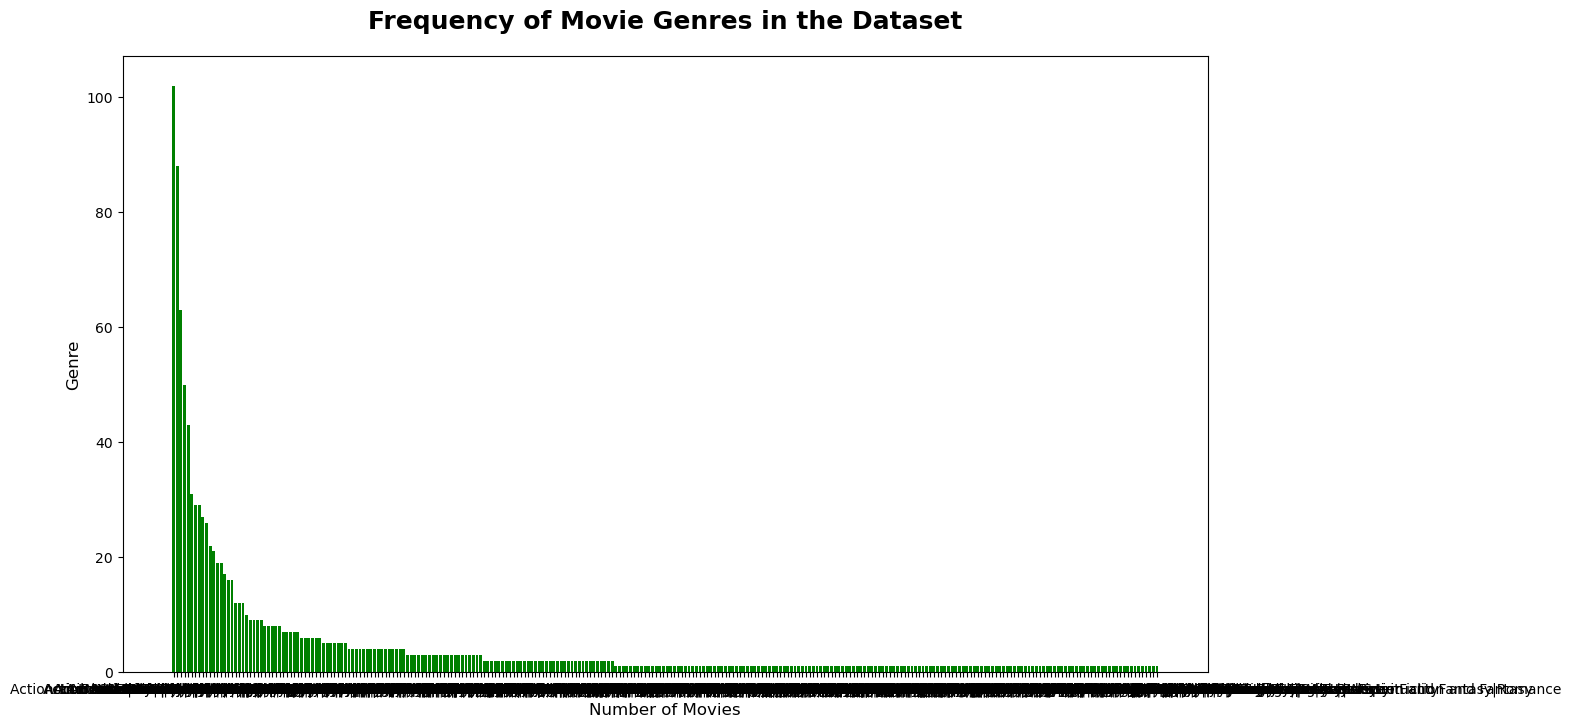

In [338]:
genre = genre_counts.index

x=genre_counts.values
y=genre
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(y, x, color='green')
ax.set_title('Frequency of Movie Genres in the Dataset', fontsize=18, weight='bold', pad=20)
ax.set_xlabel('Number of Movies', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

We can then plot using the Rotten Tomatoes reviews dataset, the rating of the movies against the year to tell us of how receptive the audience has been towards the movie industry.

In [339]:
clean_r_tomatoes_reviews['year'] = pd.to_datetime(clean_r_tomatoes_reviews['date'], errors='coerce').dt.year

Text(0.5, 1.0, 'Rating')

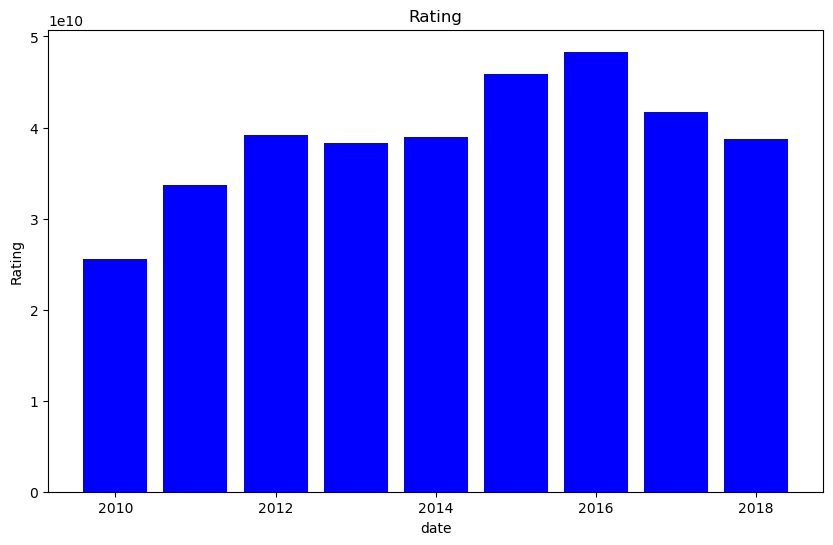

In [340]:
yearly_rating = clean_r_tomatoes_reviews.groupby('date')['rating'].sum()
x_years = yearly_gross.index
y_totals = yearly_gross.values


# This part of the code ensures that the plot is easier to read
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_years, y_totals, color='blue')
ax.set_xlabel('date')
ax.set_ylabel('Rating')
ax.set_title('Rating')


I will convert the clean data set to csv format tomake it simple to use for data analysis and making a dashboard

In [341]:
clean_bom_gross.to_csv('cleanedbom_gross_data.csv', index=False)
clean_r_tomatoes_reviews.to_csv('cleanedr_tomatoes_reviews_data.csv', index=False)
clean_r_tomatoes_movies.to_csv('cleanedr_tomatoes_movies_data.csv', index=False)